# Making a mock observation from the EAGLE simulations

This script is an example script to lay out the individual steps of making mock observations.

The steps are as follows:

1. Load the EAGLE simulated data.  Specify the distance at which we want to observe the cosmic web i.e. redshift of central wavelength of filter and the resolution that the data should be binned to.  The minimum resolution at 50Mpc away is about 14".
2. Cut out a chunk of the simulated data that corresponds to the Dragonfly FOV.  (switched with step 3 because takes too long for the whole simulation)
3. Add the noise to the simulated data to mimic observational noises (includes sky background noise, read out noise, dark current noise, and shot noise).  This depends on the exposure time of the mock observation.
4. Plot the data to check and see what it looks like.

Ta da!

In [39]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

### Step 1:  Load the data (load_data.ipynb)
Let's say we want to observe at 100 Mpc away, with a resolution of 100 arcsec.  Our filter width is 3nm which corresponds to about 20 Mpc in radial distance (so we specify a slice width of 20).

In [2]:
distance = '50Mpc'; resolution = 100.; slicewidth = 20; machine='coho'
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Loading data of slicewidth 20 (after rounding), number of slices is 4
data_50Mpc_100arcsec_20slwd.npz exists, loading now...


In [3]:
#total_fname = 'data_50Mpc_14arcsec_20slwd.npz'  # copied over from emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz
#sl = [slice(None,None,None), slice(None,None,None)]
#data = (np.load(total_fname)['arr_0'])[sl]
#data_tuple = (data,32000,1)
##np.savez(total_fname,data) ### Seems to by a python issue that cannot save large numpy object arrays, cPickle breaks or something

#data = data_tuple[0]
#data.shape
#fig,ax=plt.subplots(1,1,figsize=(10,10))
#get_halpha_SB.makemap(data,100,ax,xystarts=[0,0])
distance = '50Mpc'; resolution = 100.; slicewidth = 5; machine='coho'
data_tuple2 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)


data_50Mpc_100arcsec.npz exists, loading now...


### Step 2: Extract the Dragonfly FOV (extract_FOV.ipynb)

The type of size is <type 'list'>
The type of size is <type 'list'>


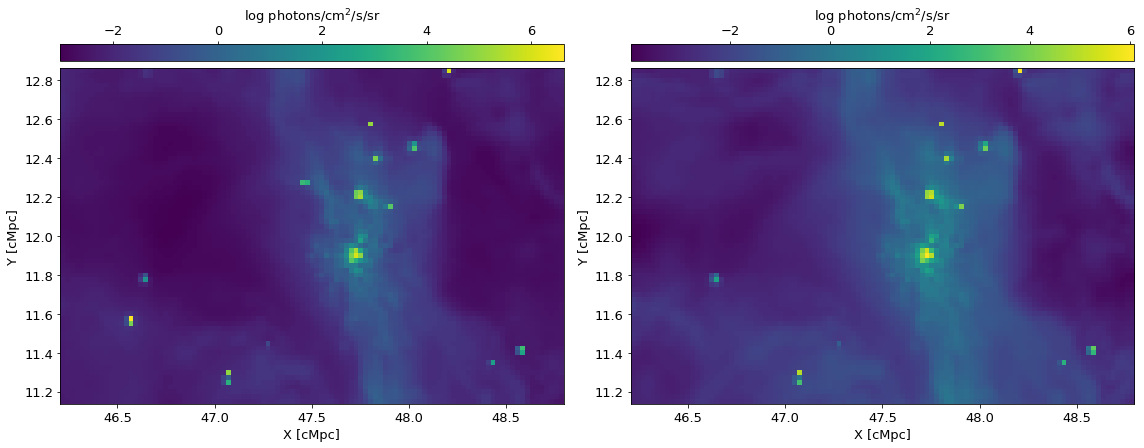

In [5]:
data_FOV_50Mpc, xystarts_50, size_50 = extractFOV(data_tuple,resolution,distance)#,x_center = 52.5, y_center = 14.)
data_FOV_2, xystarts_2, size_2       = extractFOV(data_tuple2,resolution,distance)#,x_center = 52.5, y_center = 14.)

#distance = '46Mpc'  # ('92Mpc',) actual distance that corresponds to 14" per pixel in the simulation 
#data_FOV_46Mpc, xystarts_46, size_46 = extractFOV(data_tuple,resolution,distance)

#data_FOV_50Mpc.shape
#data_FOV_46Mpc.shape

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV_50Mpc,size_50,ax1,xystarts = xystarts_50)
get_halpha_SB.makemap(data_FOV_2,size_2,ax2,xystarts = xystarts_2)
plt.tight_layout()

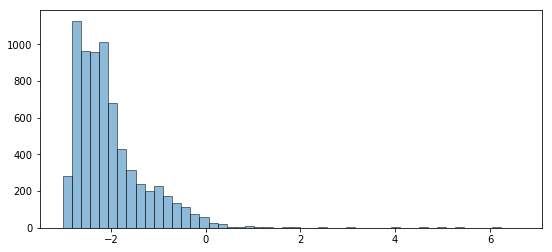

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
ax1.hist(np.ravel(data_FOV_50Mpc),edgecolor='black', alpha = 0.5,bins=50)
plt.show()

### Step 3: Add noise to the data (add_noise.ipynb)
Let's say that we want to observe for 1000 hours.

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 100.0
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels per bin is 1276.0
DEBUGGING: raise the data by 10** since was logged data before...
DEBUGGING: the total object signal [electrons] detected ranges from: 2.55061 to 1.09654e+10
The width of the filter that the data was taken with is 3.0 nm. 
DEBUGGING: Sky background in filter width of 3.0 nm is calculated already: 1.473626.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 1.473626 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 3.6338474778 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 16692441774.0
DEBUGGING: the total background noisy signal [electrons] ranges from: -43

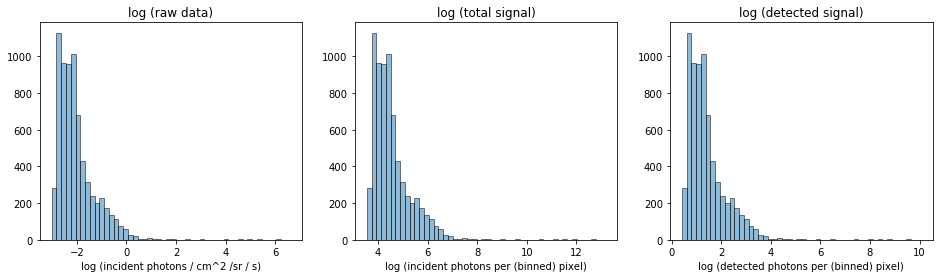

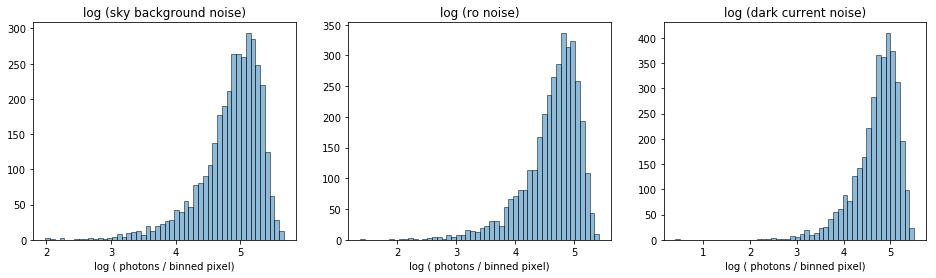

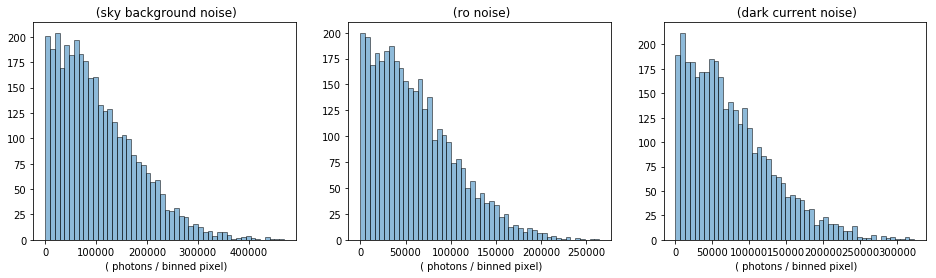

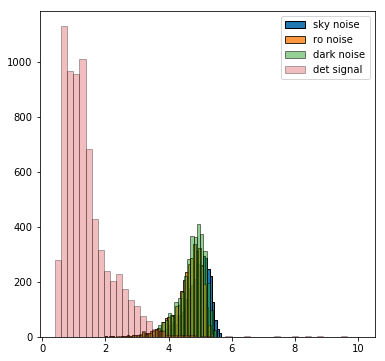

In [40]:
exptime = 1000.*60.*60.
debugging = True; R_squared = None; CMOS = False
noiseadded_signal_50,B_sky_array_50,R_array_50 = addnoise(data_FOV_50Mpc,resolution,plotchecks=True,exptime=exptime,debugging=True)#,expnum=1)
# default for addnoise: oldcam == old QE and old R

### Step 5: Plot the data


In [7]:
def plthist(ax,data1,data2=None,title='',label1='',label2='',ylim=None,xlim=None):
    ax.hist(np.ravel(data1),edgecolor='black', alpha = 0.5,label=label1+r', $\sigma_1$ = %.1f'%(np.std(data1)))
    if data2 is not None:
        ax.hist(np.ravel(data2),edgecolor='black', alpha = 0.5,label=label2+r', $\sigma_2$ = %.1f'%(np.std(data2)))
    #ax.text(0.6,0.7,r'$\sigma$_sb = %.1f'%(np.std(B_sky)),transform=ax.transAxes)
    #ax.text(0.6,0.6,r'$\sigma$_r = %.1f'%(np.std(R)),transform=ax.transAxes)
    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.set_title(title)

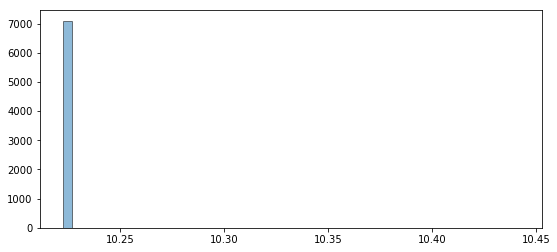

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
ax1.hist(np.ravel(np.log10(noiseadded_signal_50)),edgecolor='black', alpha = 0.5,bins=50)
plt.show()